<a href="https://colab.research.google.com/github/dhaniyapatta/ecog-joystick/blob/main/experimental_ecog_pca_ica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#@title Data retrieval
import os, requests

fname = 'joystick_track.npz'
url = "https://osf.io/6jncm/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)


# @title Install packages (`nilearn`, `nimare`. `duecredit`), import `matplotlib` and set defaults
# install packages to visualize brains and electrode locations
!pip install nilearn --quiet
!pip install nimare --quiet
!pip install duecredit --quiet
!pip install mne --quiet

from matplotlib import rcParams
from matplotlib import pyplot as plt
import numpy as np
from nilearn import plotting
from nimare import utils

import mne
# For elimiating warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import mne.viz


alldat = np.load(fname, allow_pickle=True)['dat']



rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.5 MB/s eta 0:00:00


In [81]:
# prompt: targetX = targetX[start_index:]
# Do the same for cursor and V

# Assuming 'targetX', 'cursor', and 'V' are defined and have the same length
start_index = ... # Define the start index

targetX = targetX[start_index:]
cursor = cursor[start_index:]
V = V[start_index:]


<>:4: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:5: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:6: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:7: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:8: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:4: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:5: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:6: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:7: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:8: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?


TypeError: string indices must be integers

In [82]:
subjID = 1 #@param {type:"number"}
print("Subjet Chosen:", subjID)
subject=alldat[0][subjID] #data contains data for the subject
subj_name = str('subject '+ str(subjID))

V = subj['V'].astype('float32')
targetX = subj['targetX'].flatten()   # np array 1D
targetY = subj['targetY'].flatten()   # np array 1D
cursorX = subj['cursorX'].flatten()   # np array 1D
cursorY = subj['cursorY'].flatten()   # np array 1D
locs    = subj['locs']                # [[a1 b1 c1] [a2 b2 c2] ... [a60 b60 c60]]
hemisphere = subj['hemisphere']       # list of strings
lobe = subj['lobe']                   # ...
gyrus = subj['gyrus']                 # ...
Brodmann_Area = subj['Brodmann_Area'] # ...

for i in range(len(targetX)):
  if targetX[i]==np.max(targetX):
    start_index=i
    break

targetX = targetX[start_index:]
targetY=targetY[start_index:]
cursorX = cursorX[start_index:]
cursorY
V = V[start_index:]

data = V.T
n_channels = V.shape[1]
sampling_freq = 1000  # in Hertz
ch_types = ['ecog']*n_channels
ch_names = ['chan'+str(channel) for channel in list(range(n_channels))]

info = mne.create_info(ch_names, sfreq=sampling_freq, ch_types='ecog', verbose=None)

raw = mne.io.RawArray(data, info)
print(raw.info)

Subjet Chosen: 1
Creating RawArray with float64 data, n_channels=64, n_times=246440
    Range : 0 ... 246439 =      0.000 ...   246.439 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: chan0, chan1, chan2, chan3, chan4, chan5, chan6, chan7, chan8, ...
 chs: 64 ECoG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>


In [64]:
for i in range(len(targetX)):
  if targetX[i]==np.max(targetX):
    start_index=i
    break


In [83]:
V.shape

(246440, 64)

In [84]:
# @title Filtering Data
# -----Add filter logic----
def get_filtered_raw(raw):
  raw_filtered = raw.copy().notch_filter(freqs=np.arange(60, 241, 60), picks=['ecog'])
  raw_filtered = raw_filtered.filter(l_freq=0.1, h_freq=30, picks=['ecog'])
  return raw_filtered


In [85]:
raw_filtered=get_filtered_raw(raw)
filtered_data=raw_filtered.get_data()
filtered_V=filtered_data.T

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


In [37]:
from scipy.io import loadmat
# Load the MATLAB file using scipy.io.loadmat
mat_data = loadmat("fp_joystick.mat")

# Now you can access the variables in the MATLAB file
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'CursorPosX', 'CursorPosY', 'TargetPosX', 'TargetPosY', 'subject', 'electrodes', 'data'])


In [43]:


sfreq = 1000  # Sampling frequency in Hz



# Define parameters
epoch_length = int(6300) # Number of time points per epoch

# Define start points for each epoch
epoch_start_points = np.arange(start_point, data.shape[1] - epoch_length, epoch_length)

# Extract epochs
epochs_list = []
for start in epoch_start_points:
    end = start + epoch_length
    epoch_data = raw_filtered.get_data(start=start, stop=end)
    epochs_list.append(epoch_data)

# Convert to numpy array
epochs_data = np.array(epochs_list)
print(f'Epochs data shape: {epochs_data.shape}')


Epochs data shape: (39, 64, 6300)


In [59]:

def sample_indices(seq, starting_index, k):
  resulted_seq = seq[starting_index::k]
  n = int(len(seq))
  index_list = list((np.arange(n)*k)[:len(resulted_seq)])
  return resulted_seq, index_list


def plot_mvmt_trajectory(xs, ys, spacing_index, title):
    # Sample indices and values
    xs_seq_val = sample_indices(xs, 0, spacing_index)[0]
    ys_seq_val = sample_indices(ys, 0, spacing_index)[0]
    indices = sample_indices(ys, 0, spacing_index)[1]
    print('Number of sampled points from sequences:', len(indices))

    # Calculate the x-coordinate for the vertical line

    # Create plot
    plt.figure()
    ax = plt.axes(aspect=1)
    ax.scatter(xs_seq_val, ys_seq_val, c=indices, s=2)
    ax.set_xlim(-2000, 34500)
    ax.set_ylim(-2000, 34500)
    ax.set_title(title)

    # Add vertical line
    # Add legend
    plt.legend()

    # Show plot

    plt.show()


def plot_mvmt_trajectories_compare(xs_target, ys_target, xs_cursor, ys_cursor, spacing_index, title):
    # Sample the target trajectory
    xs_target_seq, target_indices = sample_indices(xs_target, 0, spacing_index)
    ys_target_seq = sample_indices(ys_target, 0, spacing_index)[0]

    # Sample the cursor trajectory
    xs_cursor_seq, cursor_indices = sample_indices(xs_cursor, 0, spacing_index)
    ys_cursor_seq = sample_indices(ys_cursor, 0, spacing_index)[0]



    # Create the plot
    plt.figure(figsize=(6, 6))
    ax = plt.axes(aspect=1)
    ax.scatter(xs_target_seq, ys_target_seq, c=target_indices, s=2, label='Target Trajectory', cmap='Blues')
    ax.scatter(xs_cursor_seq, ys_cursor_seq, c=cursor_indices, s=2, label='Cursor Trajectory', cmap='Reds')
    ax.set_xlim(-2000, 34500)
    ax.set_ylim(-2000, 34500)
    ax.set_title(title)
    ax.legend()
    plt.show()


Number of sampled points from sequences: 6300


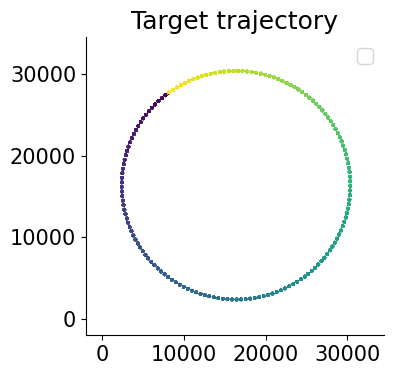

Number of sampled points from sequences: 126


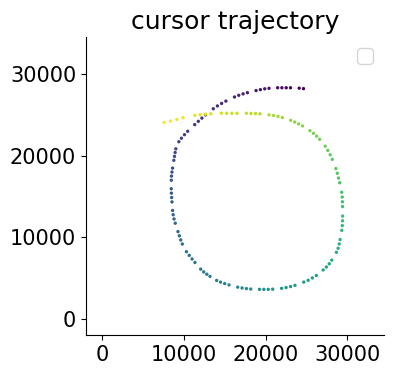

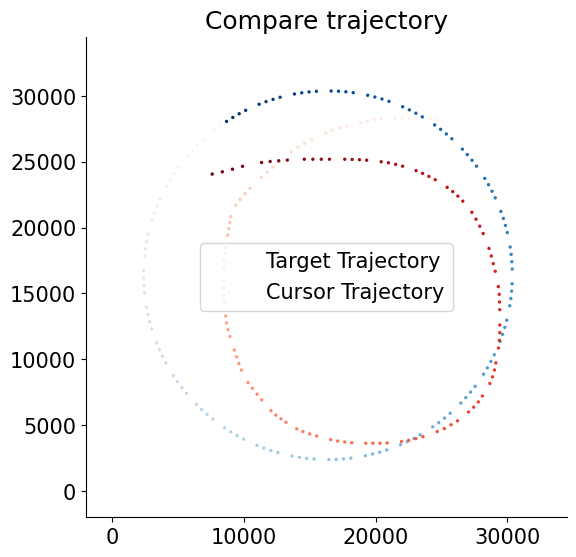

In [67]:

start_point = start_index+6300+2200
end_point = start_point+6300


xs_target = targetX[start_point:end_point]
ys_target = targetY[start_point:end_point]
plot_mvmt_trajectory(xs_target, ys_target, spacing_index=1, title = 'Target trajectory')

# xs_target = targetX[13480:19140]
# ys_target = targetY[13480:19140]
# plot_mvmt_trajectory(xs_target, ys_target, spacing_index=1, title = 'Target trajectory')


xs_cursor = cursorX[start_point:end_point]
ys_cursor = cursorY[start_point:end_point]
plot_mvmt_trajectory(xs_cursor, ys_cursor, spacing_index=50, title = 'cursor trajectory')


plot_mvmt_trajectories_compare(xs_target, ys_target, xs_cursor, ys_cursor, spacing_index=50, title = 'Compare trajectory')


In [68]:
# Define events
# For example, creating events at the start points with event_id=1
events = np.array([[start_index, 1, epoch_length] for start in epoch_start_points])
event_id = {'trial': 1}


In [78]:
events[0][:]


array([2200,    1, 6300])

In [86]:
import numpy as np
import mne
from mne import create_info

# Example data
sfreq = 1000  # Sampling frequency in Hz
subjID = 1
print("Subject Chosen:", subjID)
subj = alldat[0][subjID]  # data contains data for the subject
subj_name = 'subject ' + str(subjID)

V = subj['V'].astype('float32')
targetX = subj['targetX'].flatten()   # np array 1D
targetY = subj['targetY'].flatten()   # np array 1D
cursorX = subj['cursorX'].flatten()   # np array 1D
cursorY = subj['cursorY'].flatten()   # np array 1D
locs = subj['locs']                # [[a1 b1 c1] [a2 b2 c2] ... [a60 b60 c60]]
hemisphere = subj['hemisphere']    # list of strings
lobe = subj['lobe']                # ...
gyrus = subj['gyrus']              # ...
Brodmann_Area = subj['Brodmann_Area'] # ...

# Prepare MNE Raw object
data = V.T
n_channels = V.shape[1]
ch_types = ['ecog'] * n_channels
ch_names = ['chan' + str(channel) for channel in range(n_channels)]
picks = mne.pick_channels(raw.info['ch_names'], include=raw.info['ch_names'][:n_channels])  # Adjust to your channels

info = mne.create_info(ch_names, sfreq=sfreq, ch_types='ecog', verbose=None)
raw = mne.io.RawArray(data, info)
print(raw.info)

# Define parameters
epoch_length = 6300  # Number of time points per epoch
start_point = start_index   # Starting point for the first epoch

# Define events
events = np.array([[start, 1, epoch_length] for start in epoch_start_points])
event_id = {'trial': 1}

# Create epochs
epochs = mne.Epochs(raw, events, event_id=None,picks=picks, tmin=0, tmax=epoch_length / sfreq, baseline=None, event_repeated='', detrend=1)

# Access epoch data
epochs_data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)
print(f'Epochs data shape: {epochs_data.shape}')


Subject Chosen: 1
Creating RawArray with float64 data, n_channels=64, n_times=248640
    Range : 0 ... 248639 =      0.000 ...   248.639 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: chan0, chan1, chan2, chan3, chan4, chan5, chan6, chan7, chan8, ...
 chs: 64 ECoG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 6301 original time points ...
0 bad epochs dropped
Epochs data shape: (39, 64, 6301)


In [87]:
X = epochs.get_data(copy=False)

Using data from preloaded Raw for 39 events and 6301 original time points ...


In [89]:
from sklearn.decomposition import PCA, FastICA
from mne.decoding import UnsupervisedSpatialFilter


In [ ]:
pca = UnsupervisedSpatialFilter(PCA(10), average=False)
pca_data = pca.fit_transform(X)
ev = mne.EvokedArray(
    np.mean(pca_data, axis=0),
    mne.create_info(10, sfreq, ch_types=ch_types, verbose=None),
    tmin=0,
)
ev.plot(show=False, window_title="PCA", time_unit="s")

In [97]:
ch_types = ['ecog']*n_channels
ch_names = ['chan'+str(channel) for channel in list(range(n_channels))]
print(ch_types)
print(ch_names)

['ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog', 'ecog']
['chan0', 'chan1', 'chan2', 'chan3', 'chan4', 'chan5', 'chan6', 'chan7', 'chan8', 'chan9', 'chan10', 'chan11', 'chan12', 'chan13', 'chan14', 'chan15', 'chan16', 'chan17', 'chan18', 'chan19', 'chan20', 'chan21', 'chan22', 'chan23', 'chan24', 'chan25', 'chan26', 'chan27', 'chan28', 'chan29', 'chan30', 'chan31', 'chan32', 'chan33', 'chan34', 'chan35', 'chan36', 'chan37', 'chan38', 'chan39', 'chan40', 'chan41', 'chan42', 'chan43', 'chan44', 'chan45', 'chan46', 'chan47', 'chan48', 'chan4

In [ ]:
ica = UnsupervisedSpatialFilter(FastICA(30, whiten="unit-variance"), average=False)
ica_data = ica.fit_transform(X)
ev1 = mne.EvokedArray(
    np.mean(ica_data, axis=0),
    mne.create_info(ch_names, sfreq=sampling_freq, ch_types='ecog', verbose=None),
    tmin=0,
)
ev1.plot(show=False, window_title="ICA", time_unit="s")

plt.show()